<a href="https://colab.research.google.com/github/SophMor/ColabUeb/blob/main/JazzYSofiBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE DATOS DE BASEBALL CON TÉCNICAS DE REGRESIÓN LINEAL

Importación de librerias

In [ ]:
import pandas as pd #Data
import numpy as np
import seaborn as sns  #Graphics
import matplotlib.pyplot as plt #Graphics
#import sklearn.linear_model import LinearRegression

1. Importamos nuestro dataFrame y se lee

In [ ]:
df = pd.read_csv('/content/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


In [ ]:
df.tail(10) # Mostrar 10 últimas filas

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
312,387,124,1,67,27,36,7,1775,506,6,272,125,194,N,E,186,290,17,550.000000,N
313,580,207,8,107,71,105,5,2778,978,32,474,322,417,A,E,121,267,19,1600.000000,A
314,408,117,11,66,41,34,1,408,117,11,66,41,34,N,W,942,72,11,120.000000,N
315,593,172,22,82,100,57,1,593,172,22,82,100,57,A,W,1222,139,15,165.000000,A
316,221,53,2,21,23,22,8,1063,283,15,107,124,106,N,E,325,58,6,NaN,N
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000000,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.000000,A


In [ ]:
df.shape   #Te da la info de la tupla

(322, 20)

In [ ]:
df.info() # te da información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
df.shape

(322, 20)

# Análisis de variables categorícas

---




In [ ]:
categorical_features = df.select_dtypes("object").columns.to_list()
print(categorical_features)
print("El total de categoricas ",len(categorical_features))

['League', 'Division', 'NewLeague']
El total de categoricas  3


El valor de unicos deberia ser 2 dado que estas variables en este caso tienen 2 valores posibles

In [ ]:
count_uniques = df[categorical_features].apply(pd.Series.nunique, axis = 0)
count_uniques = pd.DataFrame({'column_name': categorical_features,'count_uniques': count_uniques})
count_uniques.sort_values('count_uniques', ascending=False)

,column_name,count_uniques
League,League,2
Division,Division,2
NewLeague,NewLeague,2


Revision del NULL

In [ ]:
#Confirmo el porcentaje de NUll
categorical_missing = []
for col in categorical_features:
        categorical_missing.append(df[col].isnull().sum() * 100 / len(df))
#Confirmo el porcentaje de NUll
categorical_missing=pd.DataFrame({'column_name': categorical_features,'percent_missing': categorical_missing})
categorical_missing.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
0,League,0.000000
1,Division,0.000000
2,NewLeague,0.000000


In [ ]:
for variable in categorical_features:
    print(df[variable].value_counts(dropna=False))
#Cuenta el numero de elementos existe en cada una

League
A    175
N    147
Name: count, dtype: int64
Division
W    165
E    157
Name: count, dtype: int64
NewLeague
A    176
N    146
Name: count, dtype: int64


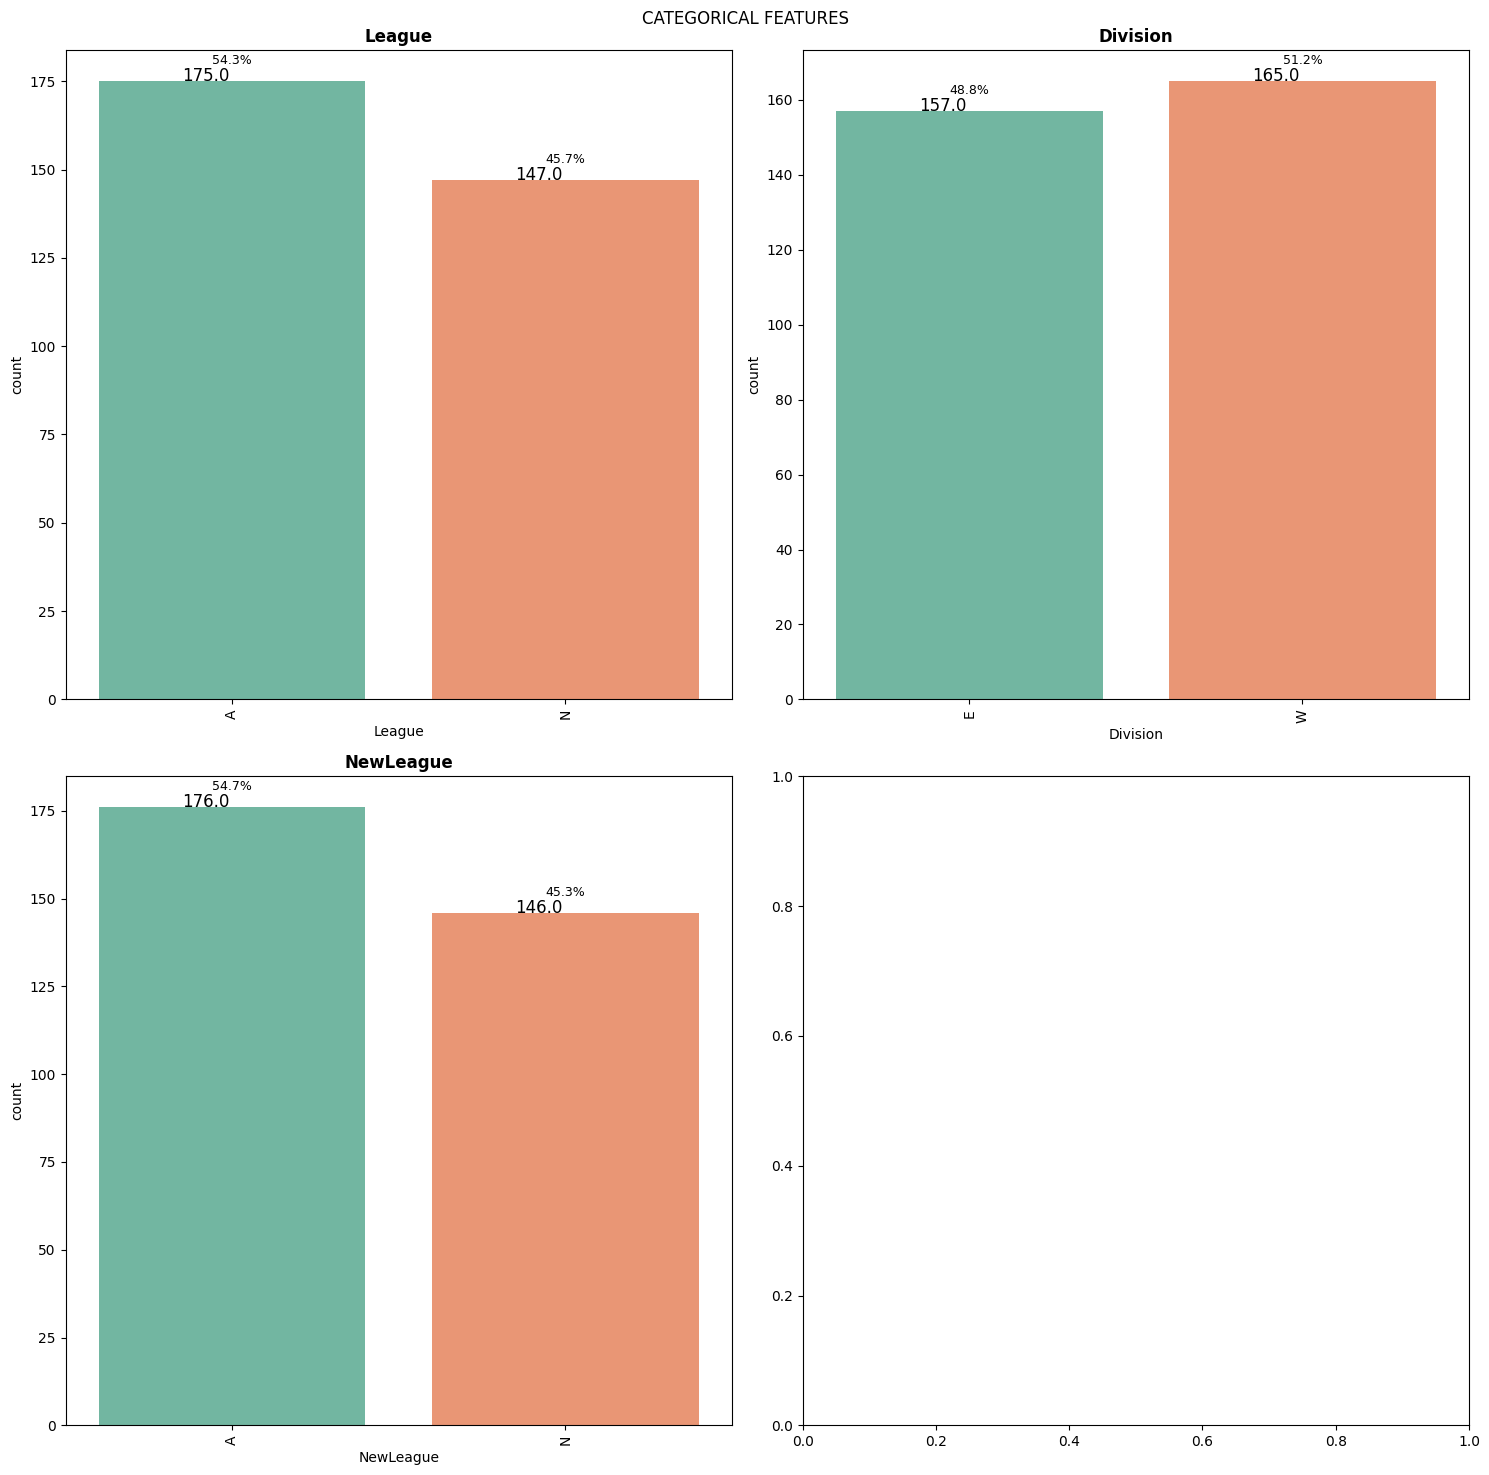

In [ ]:
import warnings #Importa las librerias de warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

total = float(len(df))
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('CATEGORICAL FEATURES')
for variable, subplot in zip(categorical_features, ax.flatten()):
    ax=sns.countplot(x=df[variable], palette = "Set2", ax=subplot) #GRÁFICO DE BARRAS
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage,(p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'bottom', xytext = (0, 10), textcoords = 'offset points',  size=9)
        ax.annotate(f'\n{p.get_height()}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.02), size=12,color='black')

    ax=ax.set_title(variable,fontsize = 12, fontweight='bold')

    for label in subplot.get_xticklabels():
        label.set_rotation(90)


fig.tight_layout()


# Análisis variables numéricas



In [ ]:
numerical_features = df.select_dtypes({"int64", "float64"}).columns.to_list() #Seleccionamos los int
print(numerical_features)
print("El total de variables numericas es ",len(numerical_features))

['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
El total de variables numericas es  17


1. Verificamos el número de variables unicas para descartar

In [ ]:
count_uniques = df[numerical_features].apply(pd.Series.nunique, axis = 0)
count_uniques = pd.DataFrame({'count_uniques': count_uniques})
count_uniques.reset_index(inplace=True)
count_uniques.rename(columns={'index':'COLUMN_NAME'}, inplace=True)

pd.set_option("display.max_rows", None)
count_uniques.sort_values('count_uniques', ascending=True)

,COLUMN_NAME,count_uniques
6,Years,22
15,Errors,29
2,HmRun,36
5,Walks,89
3,Runs,96
4,RBI,103
1,Hits,144
9,CHmRun,146
16,Salary,150
14,Assists,161


En este caso como si hay variedad pues No es necesario hacer un filtro.

Ahora vamos a mirar los datos que hacen falta

In [ ]:
numerical_features = df.select_dtypes({"int64","float64"}).columns.to_list()
numerical_missing = []
#Numero porcentual de  FALTANTES
for col in numerical_features:
        numerical_missing.append(df[col].isnull().sum() * 100 / len(df)) #Miramos los null

numerical_missing=pd.DataFrame({'column_name': numerical_features,'percent_missing': numerical_missing})
numerical_missing.sort_values('percent_missing',ascending=False, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(numerical_missing)

   column_name  percent_missing
16      Salary        18.322981
9       CHmRun         0.000000
15      Errors         0.000000
14     Assists         0.000000
13     PutOuts         0.000000
12      CWalks         0.000000
11        CRBI         0.000000
10       CRuns         0.000000
0        AtBat         0.000000
1         Hits         0.000000
7       CAtBat         0.000000
6        Years         0.000000
5        Walks         0.000000
4          RBI         0.000000
3         Runs         0.000000
2        HmRun         0.000000
8        CHits         0.000000


In [ ]:
df = df.dropna()  # Elimina todas las filas con valores NaN

In [ ]:
pd.set_option('float_format', '{:f}'.format)
df[numerical_features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.000000,403.642586,147.307209,19.000000,282.500000,413.000000,526.000000,687.000000
Hits,263.000000,107.828897,45.125326,1.000000,71.500000,103.000000,141.500000,238.000000
HmRun,263.000000,11.619772,8.757108,0.000000,5.000000,9.000000,18.000000,40.000000
Runs,263.000000,54.745247,25.539816,0.000000,33.500000,52.000000,73.000000,130.000000
RBI,263.000000,51.486692,25.882714,0.000000,30.000000,47.000000,71.000000,121.000000
Walks,263.000000,41.114068,21.718056,0.000000,23.000000,37.000000,57.000000,105.000000
Years,263.000000,7.311787,4.793616,1.000000,4.000000,6.000000,10.000000,24.000000
CAtBat,263.000000,2657.543726,2286.582929,19.000000,842.500000,1931.000000,3890.500000,14053.000000
CHits,263.000000,722.186312,648.199644,4.000000,212.000000,516.000000,1054.000000,4256.000000
CHmRun,263.000000,69.239544,82.197581,0.000000,15.000000,40.000000,92.500000,548.000000


In [ ]:
#Realizamos la sumatoria para ver las faltantes

In [ ]:
df.isnull().sum()
#df.dropna()
#df.dropna(subset=['variable'], axis=1)

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0




---
Análisis estadístico de las estadísticas descriptivas


* **Cantidad de datos (count)**  
* **Promedio (mean)**  
* **Desviación estándar (std)**  
* **Mínimo (min)**  
* **Percentil 25% (Q1)**  
* **Mediana (50%) (Q2)**  
* **Percentil 75% (Q3)**  
* **Máximo (max)**  



In [ ]:
for variable in numerical_features:
  var=df[variable].describe().to_frame().T
  display(var)

#Para cada columna describa y convierta  dataFrame .T transpone

,count,mean,std,min,25%,50%,75%,max
AtBat,263.000000,403.642586,147.307209,19.000000,282.500000,413.000000,526.000000,687.000000


,count,mean,std,min,25%,50%,75%,max
Hits,263.000000,107.828897,45.125326,1.000000,71.500000,103.000000,141.500000,238.000000


,count,mean,std,min,25%,50%,75%,max
HmRun,263.000000,11.619772,8.757108,0.000000,5.000000,9.000000,18.000000,40.000000


,count,mean,std,min,25%,50%,75%,max
Runs,263.000000,54.745247,25.539816,0.000000,33.500000,52.000000,73.000000,130.000000


,count,mean,std,min,25%,50%,75%,max
RBI,263.000000,51.486692,25.882714,0.000000,30.000000,47.000000,71.000000,121.000000


,count,mean,std,min,25%,50%,75%,max
Walks,263.000000,41.114068,21.718056,0.000000,23.000000,37.000000,57.000000,105.000000


,count,mean,std,min,25%,50%,75%,max
Years,263.000000,7.311787,4.793616,1.000000,4.000000,6.000000,10.000000,24.000000


,count,mean,std,min,25%,50%,75%,max
CAtBat,263.000000,2657.543726,2286.582929,19.000000,842.500000,1931.000000,3890.500000,14053.000000


,count,mean,std,min,25%,50%,75%,max
CHits,263.000000,722.186312,648.199644,4.000000,212.000000,516.000000,1054.000000,4256.000000


,count,mean,std,min,25%,50%,75%,max
CHmRun,263.000000,69.239544,82.197581,0.000000,15.000000,40.000000,92.500000,548.000000


,count,mean,std,min,25%,50%,75%,max
CRuns,263.000000,361.220532,331.198571,2.000000,105.500000,250.000000,497.500000,2165.000000


,count,mean,std,min,25%,50%,75%,max
CRBI,263.000000,330.418251,323.367668,3.000000,95.000000,230.000000,424.500000,1659.000000


,count,mean,std,min,25%,50%,75%,max
CWalks,263.000000,260.266160,264.055868,1.000000,71.000000,174.000000,328.500000,1566.000000


,count,mean,std,min,25%,50%,75%,max
PutOuts,263.000000,290.711027,279.934575,0.000000,113.500000,224.000000,322.500000,1377.000000


,count,mean,std,min,25%,50%,75%,max
Assists,263.000000,118.760456,145.080577,0.000000,8.000000,45.000000,192.000000,492.000000


,count,mean,std,min,25%,50%,75%,max
Errors,263.000000,8.593156,6.606574,0.000000,3.000000,7.000000,13.000000,32.000000


,count,mean,std,min,25%,50%,75%,max
Salary,263.000000,535.925882,451.118681,67.500000,190.000000,425.000000,750.000000,2460.000000


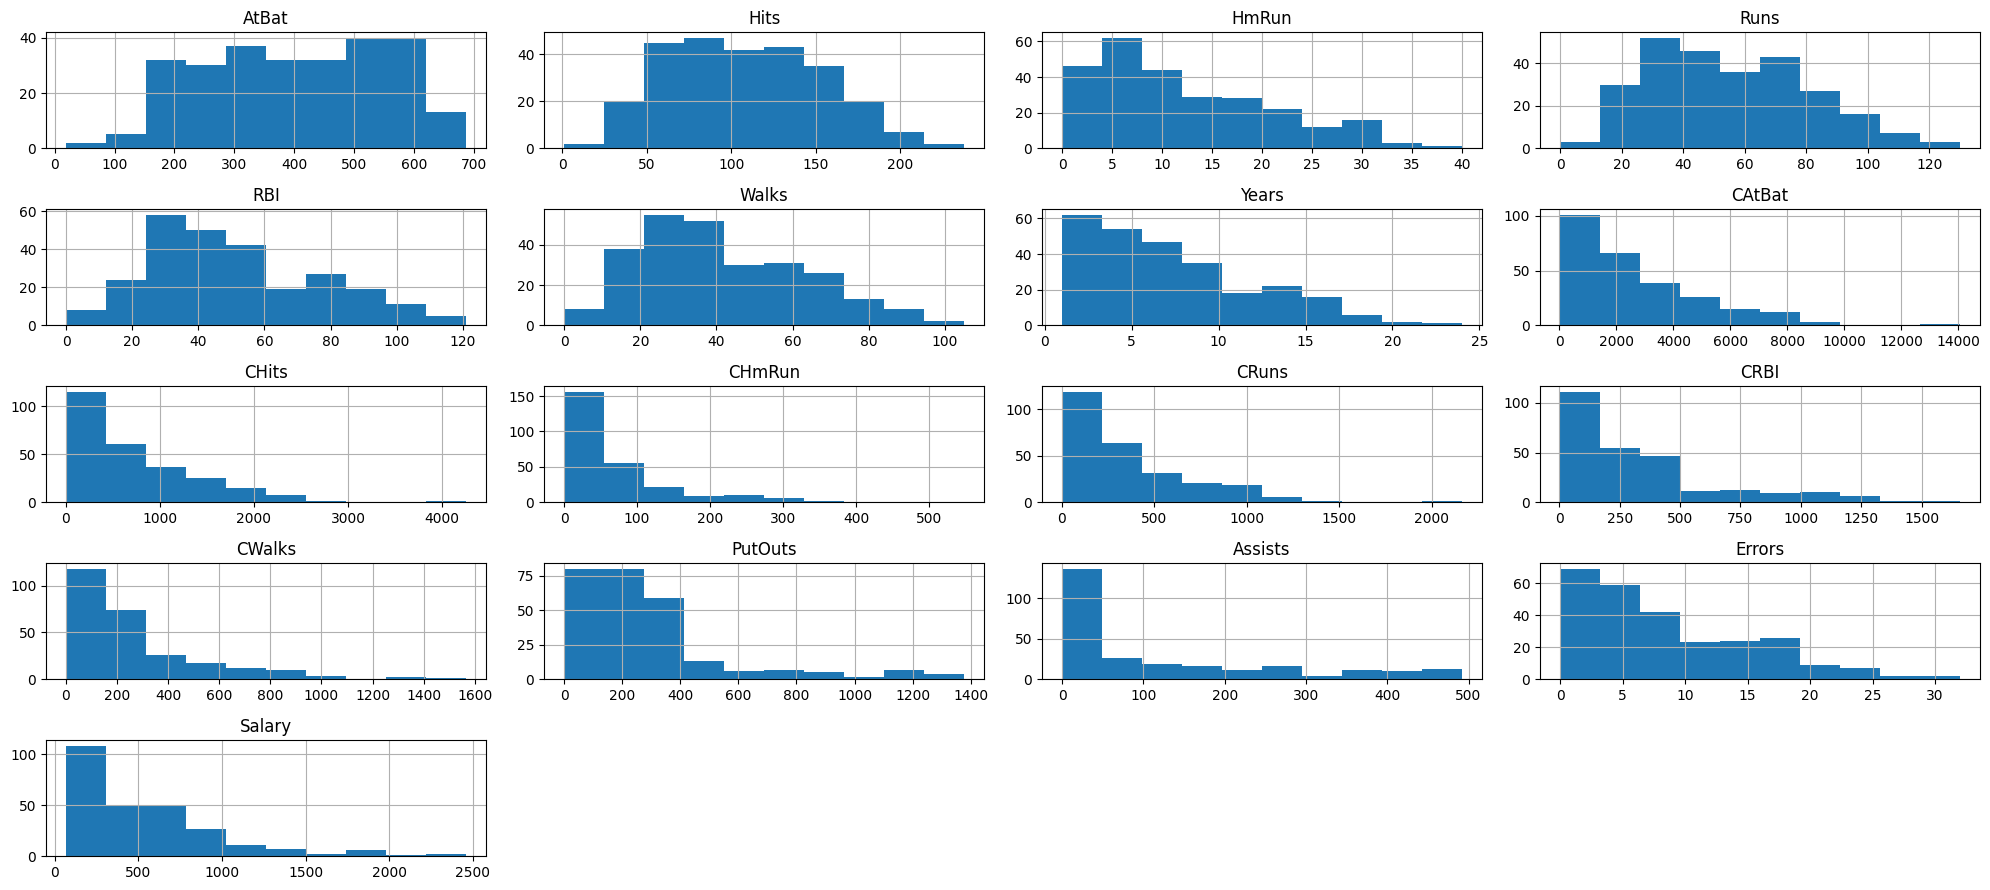

In [ ]:
df.hist(figsize=(20,9))
plt.tight_layout()
plt.show()

Grafiquemos la desviación

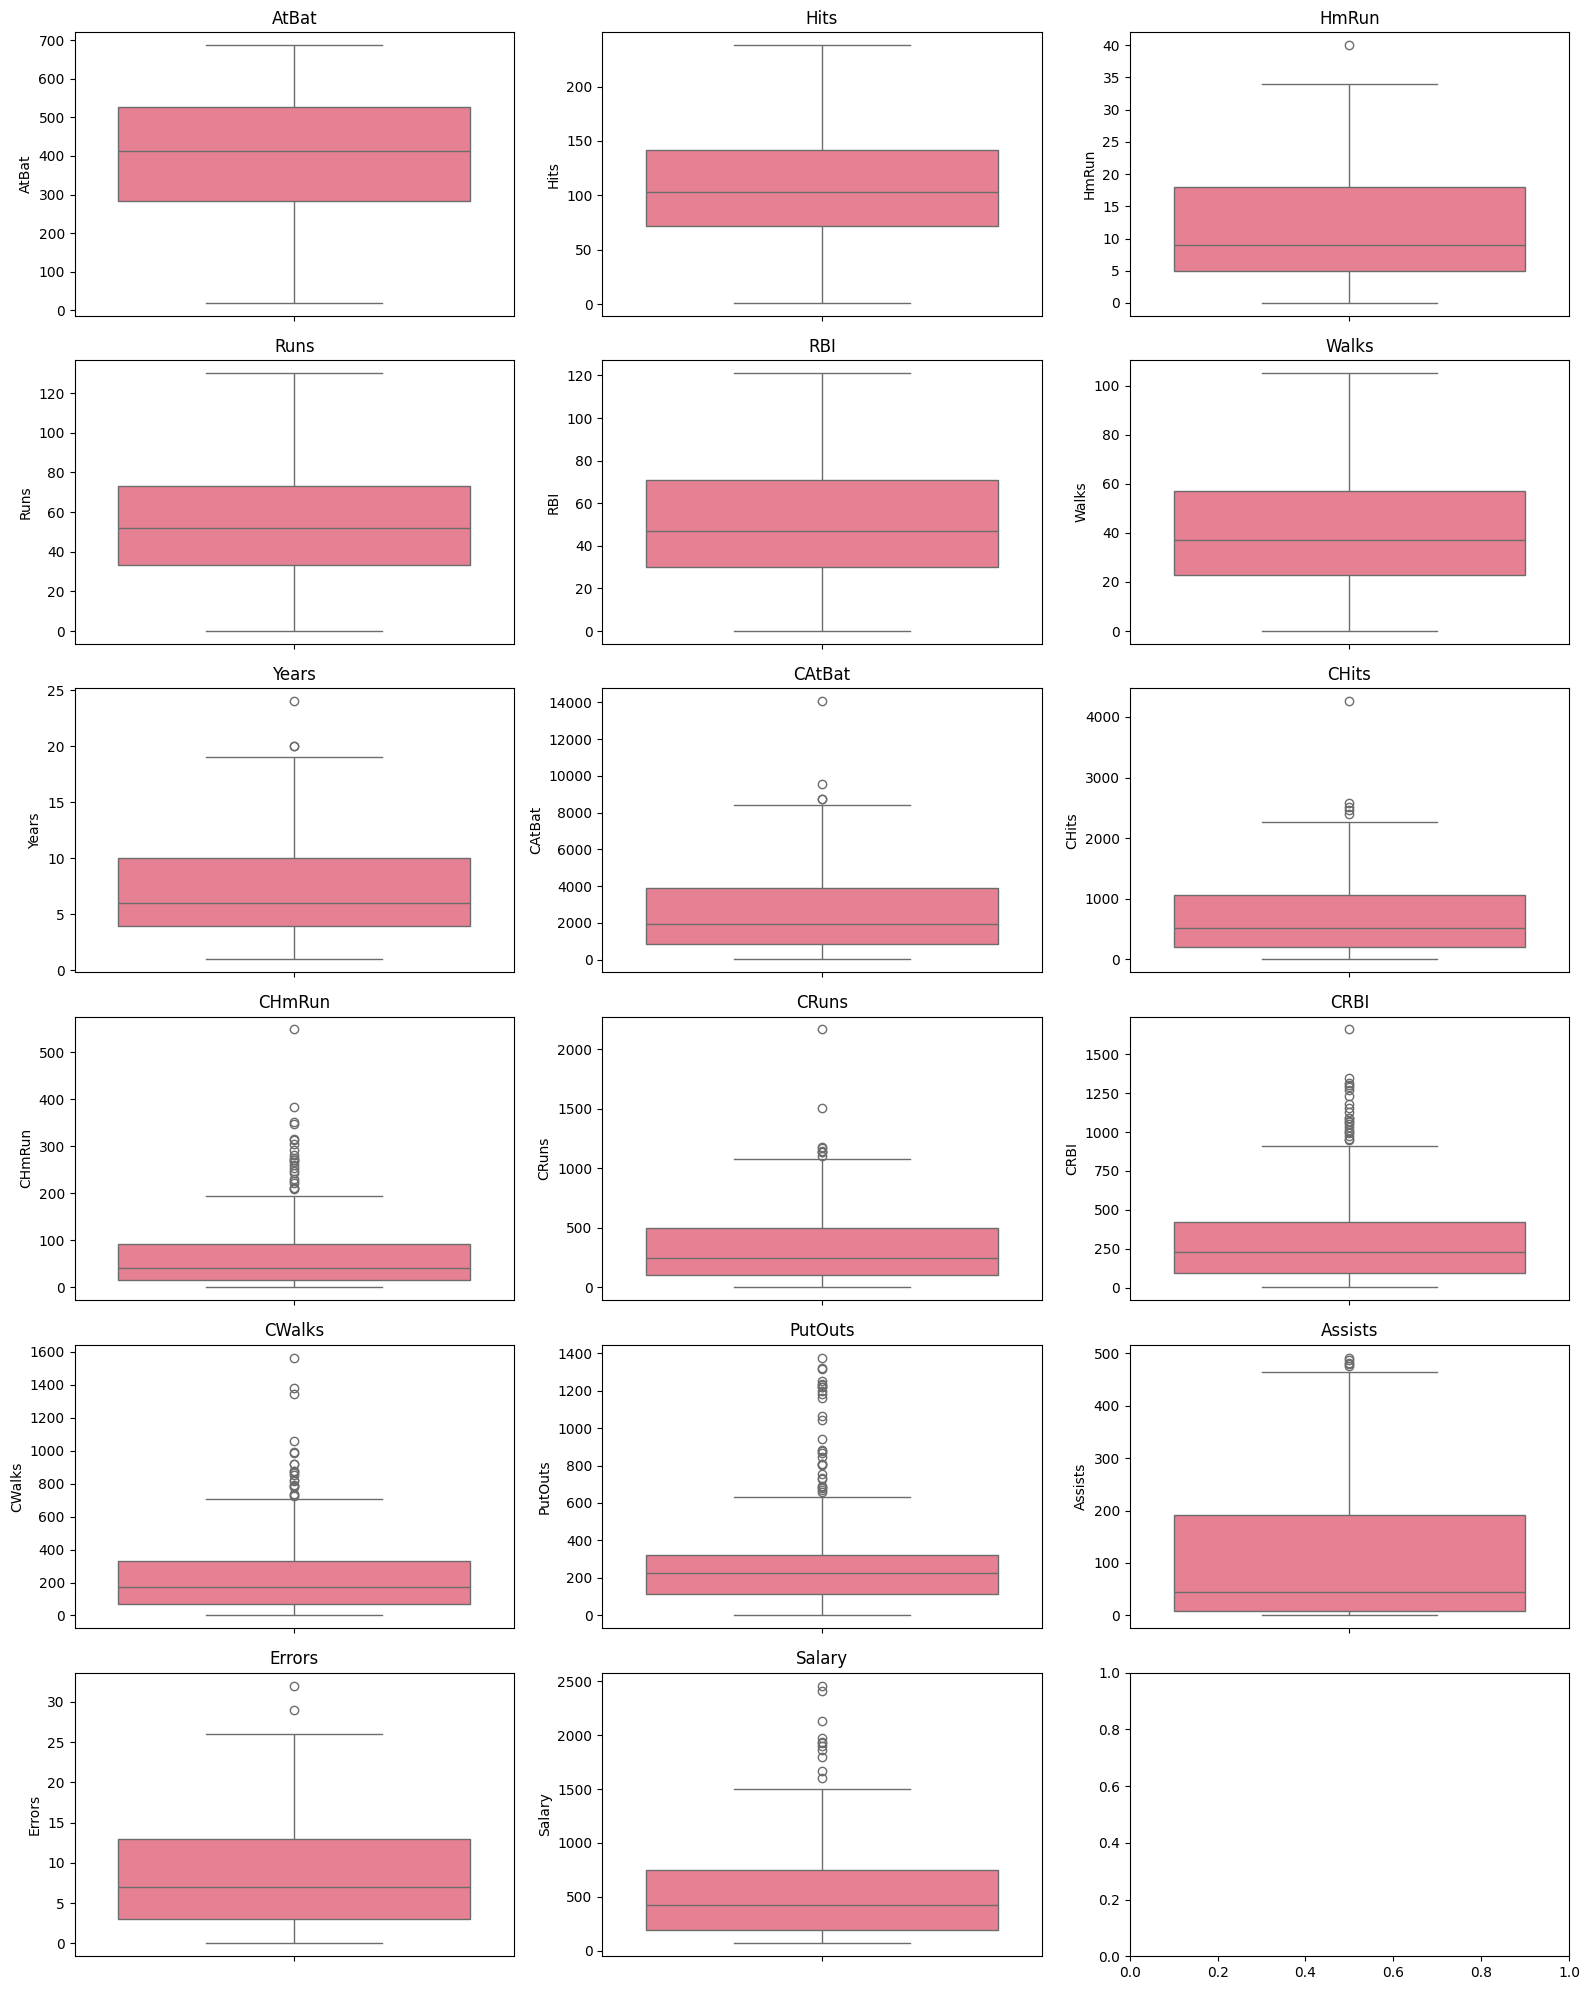

In [ ]:
fig, ax = plt.subplots(6, 3, figsize=(16,20))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(y=df[variable], ax=subplot, palette="husl")
    subplot.set_title(variable, fontsize=12)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

fig.tight_layout()

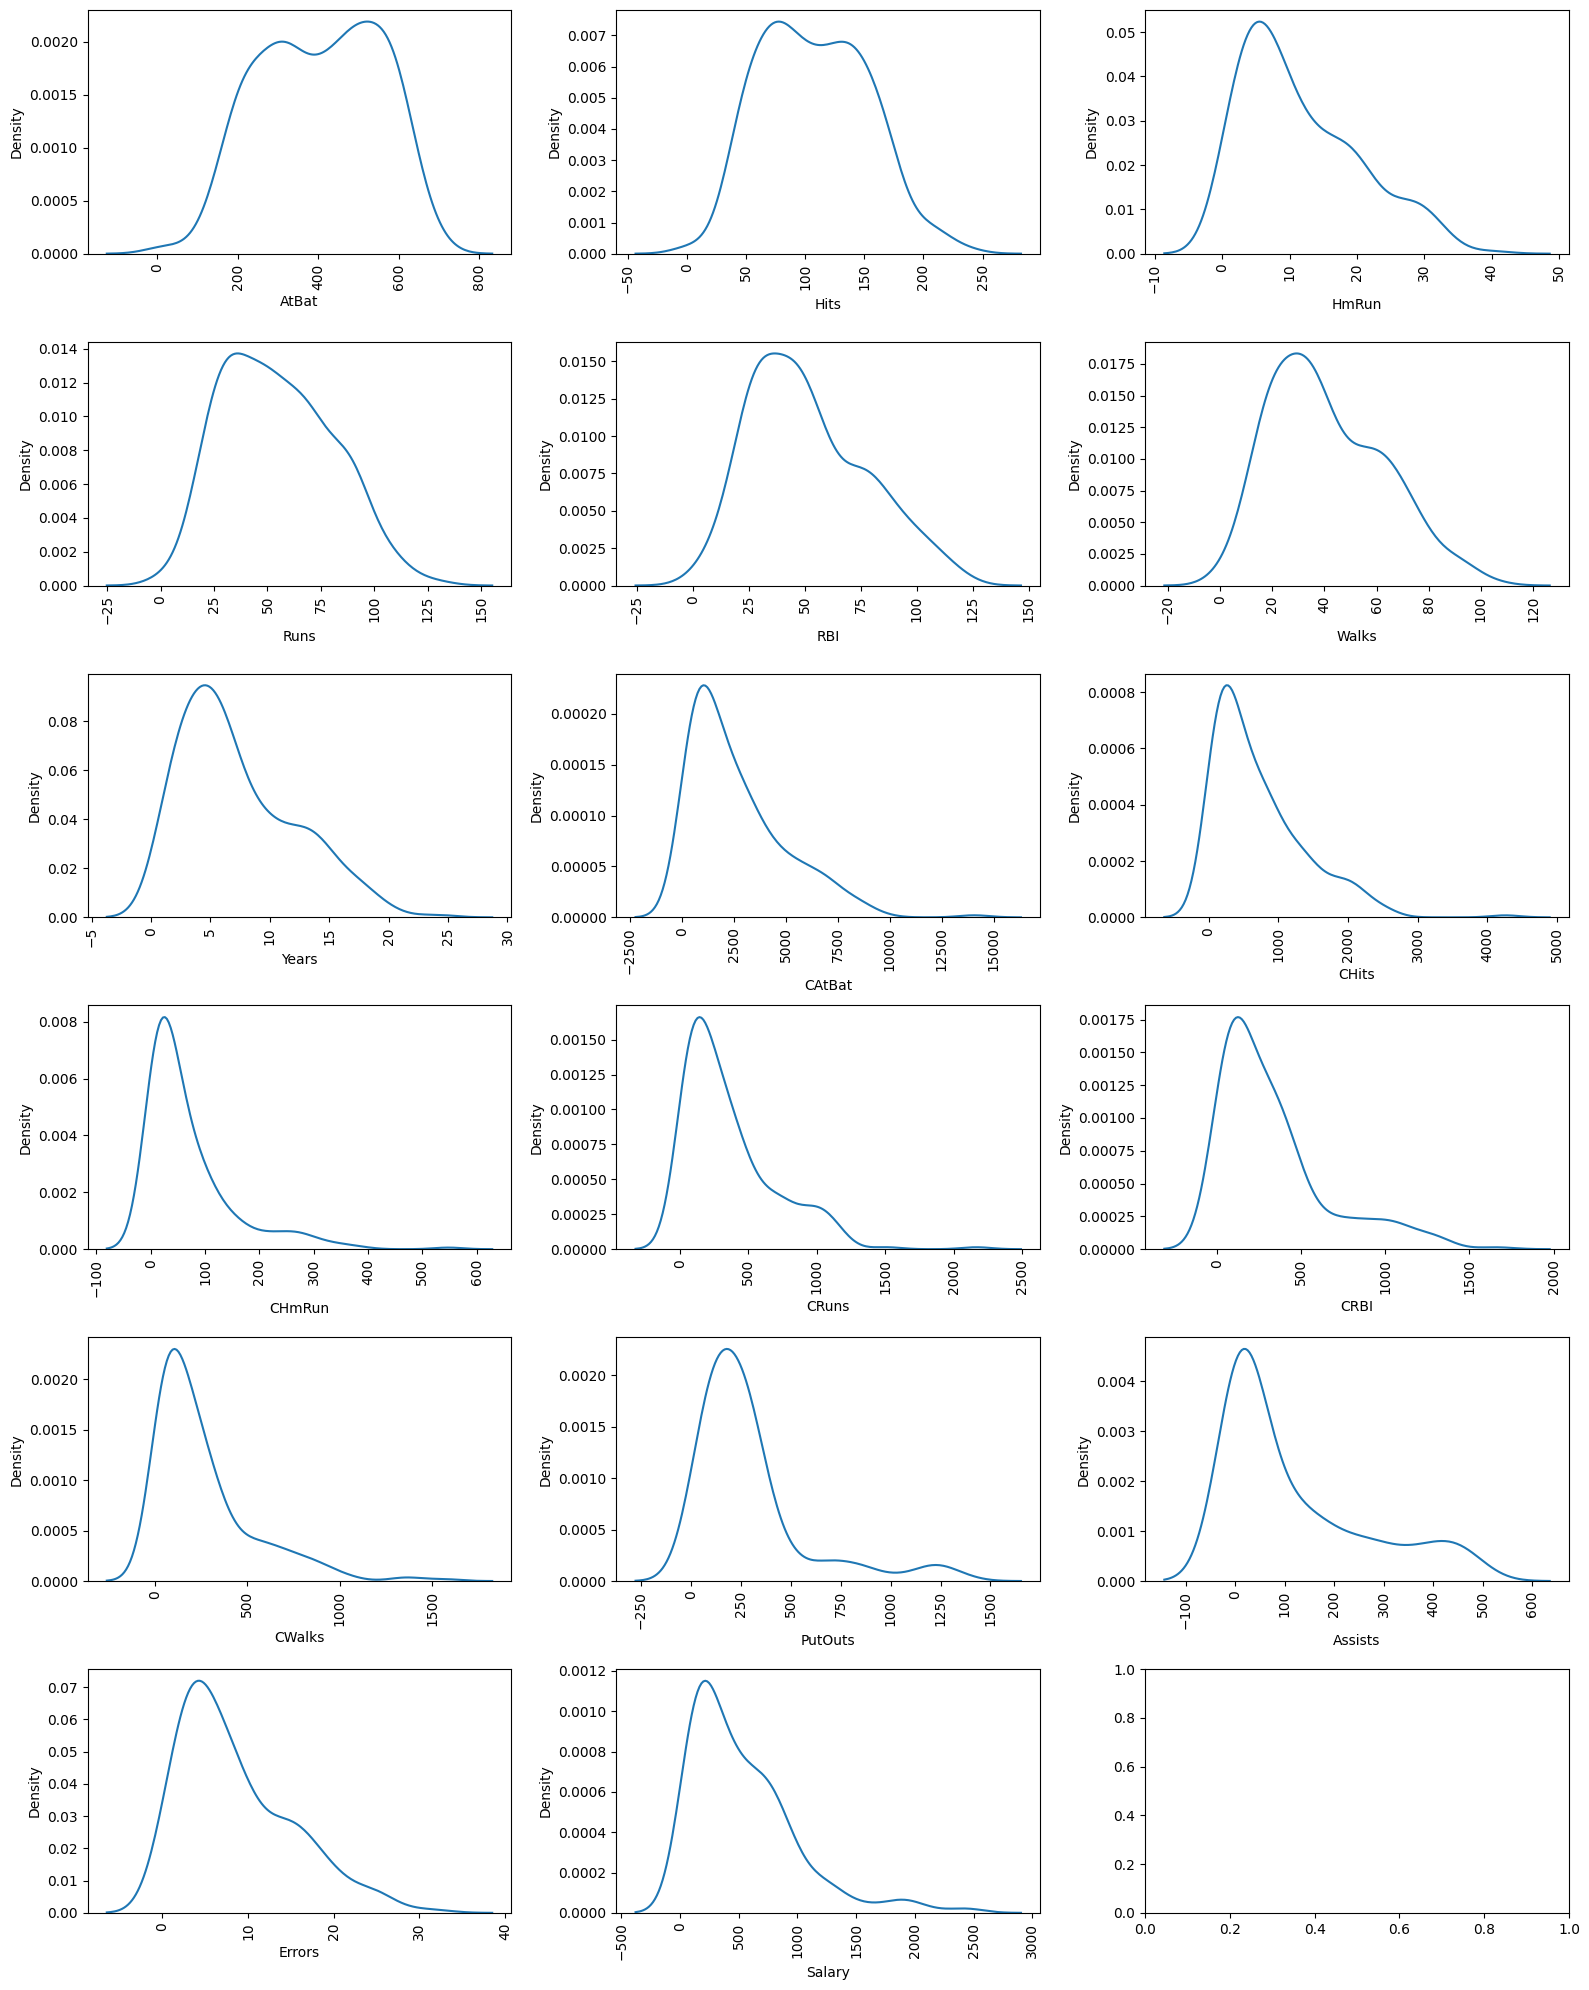

In [ ]:
fig, ax = plt.subplots(6, 3, figsize=(16,20))
for variable, subplot in zip(numerical_features, ax.flatten()):
  sns.kdeplot(data = df, x=df[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

fig.tight_layout()
# Ver gráficos de densidad KDE

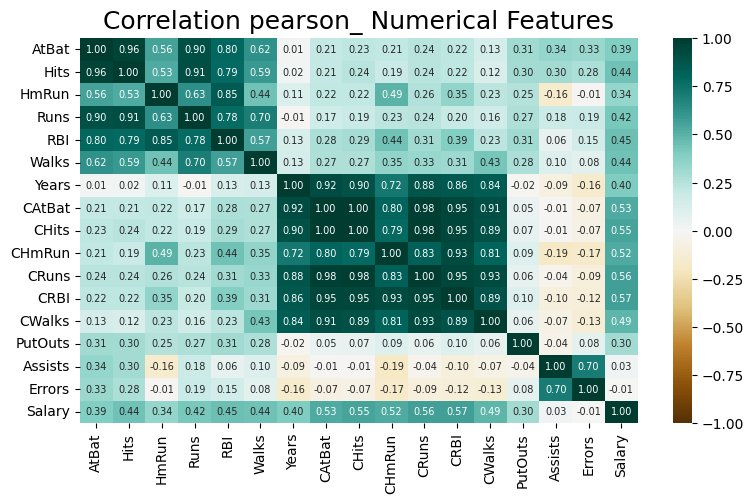

In [ ]:
# Creacion mapa de calor

numerical = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

plt.figure(figsize=(9,5))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df[numerical_features].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG',fmt='.2f', annot_kws={'size': 7})
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation pearson_ Numerical Features', fontdict={'fontsize':18}, pad=7);
#export
plt.savefig('numerical_correlation_clean.png',dpi=300,bbox_inches='tight')

# Regresión lineal sin manejo de Outliers y con statsmodel

In [ ]:
import statsmodels.formula.api as smf # Importación librería manejo statmodel

En este caso lo que se realiza es el modelo con nuestro salario y los homeRuns globales.

In [ ]:
lm = smf.ols(formula="Salary ~ CHmRun - 1", data=df).fit() #Se aplica minimo cuadrado
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.565
Model:                            OLS   Adj. R-squared (uncentered):              0.564
Method:                 Least Squares   F-statistic:                              340.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                    2.62e-49
Time:                        01:34:19   Log-Likelihood:                         -1986.5
No. Observations:                 263   AIC:                                      3975.
Df Residuals:                     262   BIC:                                      3979.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHmRun         4.9023      0.266     18.458      0.000       4.379       5.425
==============================================================================
Omnibus:                       53.098   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.082
Skew:                          -0.275   Prob(JB):                    1.13e-141
Kurtosis:                      10.677   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred = lm.predict(df['CHmRun']) #Predicción con el CHmRun


Gráfica de identificación de  patrones

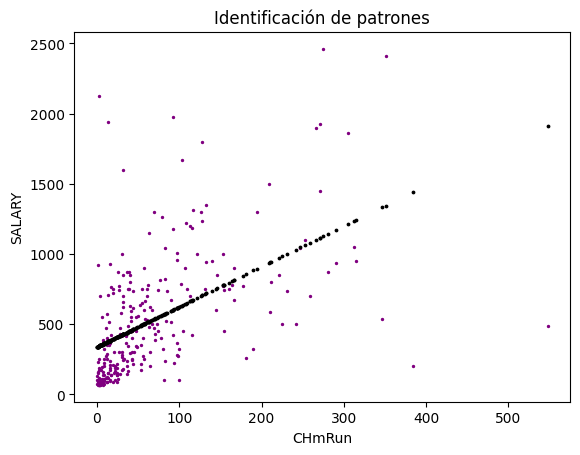

In [ ]:
plt.scatter(df['CHmRun'],df['Salary'],color='purple',s=2)
plt.scatter(df['CHmRun'], pred, s=3, color='black')
plt.title('Identificación de patrones')
plt.xlabel('CHmRun')
plt.ylabel('SALARY')
plt.show()
#Gráfico de dispersión

# Análisis lineal sin manejo de Outliers con RIDGE

In [ ]:
#Importar librerías para manejo de Ridge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()  # Escalamos los datos
X_scaled = scaler.fit_transform(df[['CHmRun']]) #transformamos los datos
y = df['Salary'] # establece el eje Y

ridge_model = Ridge(alpha=1.0)  # Entrenamos el modelo Ridge
ridge_model.fit(X_scaled, y)

# Predicciones usando los datos escalados
pred = ridge_model.predict(X_scaled)



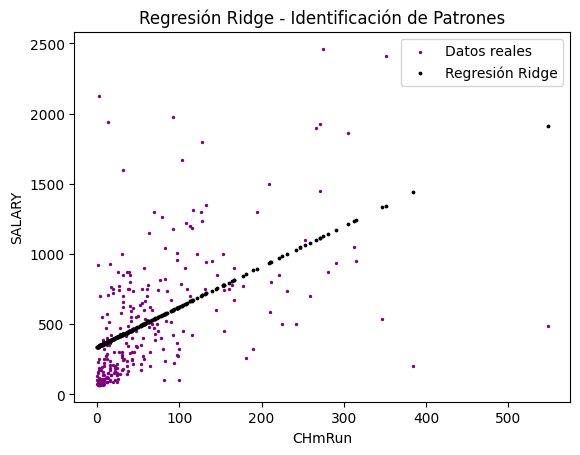

In [ ]:
# Graficar datos reales
plt.scatter(df['CHmRun'], df['Salary'], color='purple', s=2, label="Datos reales")

# Graficar la regresión Ridge
plt.scatter(df['CHmRun'], pred, color='black', s=3, label="Regresión Ridge")

plt.title('Regresión Ridge - Identificación de Patrones')
plt.xlabel('CHmRun')
plt.ylabel('SALARY')
plt.legend()
plt.show()


# Regresión lineal Sin outlier LASSO ▶

In [ ]:
#Importar librerias PARA MANEJAR LASSO
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
# Escalar los datos
scalerlasso = StandardScaler()
X_scaledLasso = scaler.fit_transform(df[['CHmRun']])
yLasso = df['Salary']

In [ ]:
# Entrenar el modelo
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_scaledLasso, yLasso)

# Predicciones
predLasso = lasso_model.predict(X_scaledLasso)

# Graficar los puntos reales
plt.scatter(df['CHmRun'], df['Salary'], color='purple', s=2, label="Datos reales")

# Graficar la regresión Lasso
plt.scatter(df['CHmRun'], predLasso, color='black', s=3, label="Regresión Lasso")

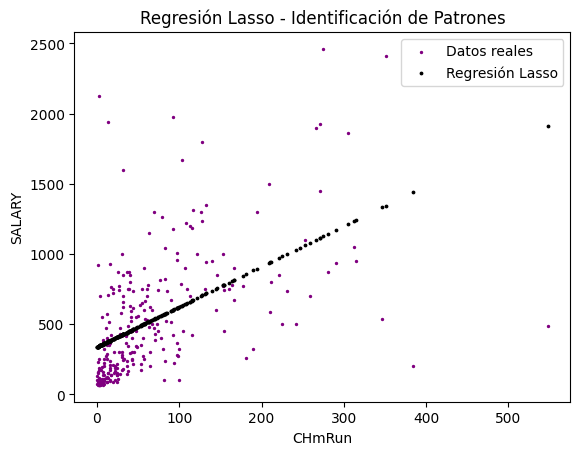

In [ ]:

# Personalizar gráfico
plt.title('Regresión Lasso - Identificación de Patrones')
plt.xlabel('CHmRun')
plt.ylabel('SALARY')
plt.legend()
plt.show()




## Regresión Lineal con Sklearn sin manejo de Outliers ⚗

Importación librerias manejo SKlearn

In [ ]:
'''import pandas as pd #Cualquier error es mejor reimportar
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder'''

'import pandas as pd #Cualquier error es mejor reimportar\nfrom sklearn.svm import SVR\nfrom sklearn.feature_selection import RFE\nfrom sklearn.preprocessing import LabelEncoder'

In [ ]:
'''print("Columnas del DataFrame:", df.columns)
X = df.drop(labels='Salary', axis=1)  # Excluir la columna 'Salary'
y = df['Salary']  # Variable objetivo'''

'print("Columnas del DataFrame:", df.columns)\nX = df.drop(labels=\'Salary\', axis=1)  # Excluir la columna \'Salary\'\ny = df[\'Salary\']  # Variable objetivo'

In [ ]:
'''feature_cols = ['CRBI','CRuns','CHits','CWalks','CHmRun'
'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
                'PutOuts', 'Assists','League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N','Errors']'''

"feature_cols = ['CRBI','CRuns','CHits','CWalks','CHmRun'\n'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',\n                'PutOuts', 'Assists','League_A', 'League_N', 'Division_E', 'Division_W',\n       'NewLeague_A', 'NewLeague_N','Errors']"

In [ ]:
'''categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", categorical_cols)

# Convertir variables categóricas en numéricas
label_enc = LabelEncoder()

for col in categorical_cols:
    X[col] = label_enc.fit_transform(X[col])

# Asegurar que todas las columnas son numéricas
print("Tipos de datos después de conversión:", X.dtypes)'''

'categorical_cols = X.select_dtypes(include=[\'object\']).columns.tolist()\nprint("Columnas categóricas:", categorical_cols)\n\n# Convertir variables categóricas en numéricas\nlabel_enc = LabelEncoder()\n\nfor col in categorical_cols:\n    X[col] = label_enc.fit_transform(X[col])\n\n# Asegurar que todas las columnas son numéricas\nprint("Tipos de datos después de conversión:", X.dtypes)'

In [ ]:
'''estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X, y)

# Ver cuáles son las características seleccionadas
selected_features = X.columns[selector.support_]
#print("Características seleccionadas:", selected_features)
#X.head()'''

'estimator = SVR(kernel="linear")\nselector = RFE(estimator, n_features_to_select=4, step=1)\nselector = selector.fit(X, y)  \n\n# Ver cuáles son las características seleccionadas\nselected_features = X.columns[selector.support_]\n#print("Características seleccionadas:", selected_features)\n#X.head()'

In [ ]:
##columns_to_use = ['NewLeague_N', 'NewLeague_A', 'Division_W']
'''
list(zip(selected_features, selector.support_))
selector.support_
x_pred = X[columns_to_use]
lm3 = LinearRegression()
lm3.fit(x_pred, y)

from sklearn.metrics import mean_squared_error, r2_score #Importación librerias manejo media etc

print("Coeficientes:", lm3.coef_)# Coeficientes
print("Intersección:", lm3.intercept_)# Intersección (término independiente)
# Métricas de evaluación del modelo
y_pred = lm3.predict(x_pred )
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)
import plotly.express as px
lm3 = LinearRegression()
lm3.fit(x, y)

# Obtener los coeficientes y sus características correspondientes
coef_importances = pd.DataFrame({"Importance": abs(lm3.coef_)}, index=x.columns)

# Ordenar por importancia
coef_importances = coef_importances.sort_values(by="Importance", ascending=False)

# Tomar las 10 variables más importantes (opcional)
top_features = coef_importances.head(10)

# Generar el gráfico de barras
# Generar el gráfico de barras con una paleta de colores diferente, por ejemplo
fig = px.bar(top_features, x=top_features.index, y='Importance', text='Importance',
             opacity=0.7, color_discrete_sequence=px.colors.sequential.matter)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#1c1b1b'),
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 10 Most Important Predictors',
                  coloraxis_showscale=False, showlegend=False, font_color="#303030", height=500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance",
                  xaxis=dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()'''

'\nlist(zip(selected_features, selector.support_))\nselector.support_\nx_pred = X[columns_to_use]\nlm3 = LinearRegression()\nlm3.fit(x_pred, y)\n\nfrom sklearn.metrics import mean_squared_error, r2_score #Importación librerias manejo media etc\n\nprint("Coeficientes:", lm3.coef_)# Coeficientes\nprint("Intersección:", lm3.intercept_)# Intersección (término independiente)\n# Métricas de evaluación del modelo\ny_pred = lm3.predict(x_pred )\nmse = mean_squared_error(y, y_pred)\nr2 = r2_score(y, y_pred)\n\nprint("Mean Squared Error (MSE):", mse)\nprint("R^2 Score:", r2)\nimport plotly.express as px\nlm3 = LinearRegression()\nlm3.fit(x, y)\n\n# Obtener los coeficientes y sus características correspondientes\ncoef_importances = pd.DataFrame({"Importance": abs(lm3.coef_)}, index=x.columns)\n\n# Ordenar por importancia\ncoef_importances = coef_importances.sort_values(by="Importance", ascending=False)\n\n# Tomar las 10 variables más importantes (opcional)\ntop_features = coef_importances.head(10



---



---



---



---

# ANÁLISIS DE REGRESIÓN LINEAL CON OUTLIERS


Un valor más extremo (outlier) es un valor en un conjunto de datos que es muy diferente de los otros valores.

In [ ]:
!pip install feature-engine #Instalamos nuestra librería

In [ ]:
from feature_engine.outliers import Winsorizer # Importamos la librería a usar

In [ ]:
winsor = Winsorizer(capping_method='iqr',
                    tail='both',
                    fold=1.5,
                    variables=numerical_features
                    )

'''
el IQR; va a ser para detectar outliers
tail: va a cortar los valores extremos
fold: el umbral
'''

'\nel IQR; va a ser para detectar outliers\ntail: va a cortar los valores extremos\nfold: el umbral \n'

In [ ]:
df_winsorized = winsor.fit_transform(df)
print(df_winsorized.describe())  # Ver los cambios'''


           AtBat       Hits      HmRun       Runs        RBI      Walks  \
count 263.000000 263.000000 263.000000 263.000000 263.000000 263.000000   
mean  403.642586 107.828897  11.610266  54.745247  51.486692  41.114068   
std   147.307209  45.125326   8.727491  25.539816  25.882714  21.718056   
min    19.000000   1.000000   0.000000   0.000000   0.000000   0.000000   
25%   282.500000  71.500000   5.000000  33.500000  30.000000  23.000000   
50%   413.000000 103.000000   9.000000  52.000000  47.000000  37.000000   
75%   526.000000 141.500000  18.000000  73.000000  71.000000  57.000000   
max   687.000000 238.000000  37.500000 130.000000 121.000000 105.000000   

           Years      CAtBat       CHits     CHmRun       CRuns       CRBI  \
count 263.000000  263.000000  263.000000 263.000000  263.000000 263.000000   
mean    7.285171 2630.144487  712.186312  62.681559  354.167300 311.610266   
std     4.717036 2187.278702  610.878069  62.575017  306.858489 274.661439   
min     1.00

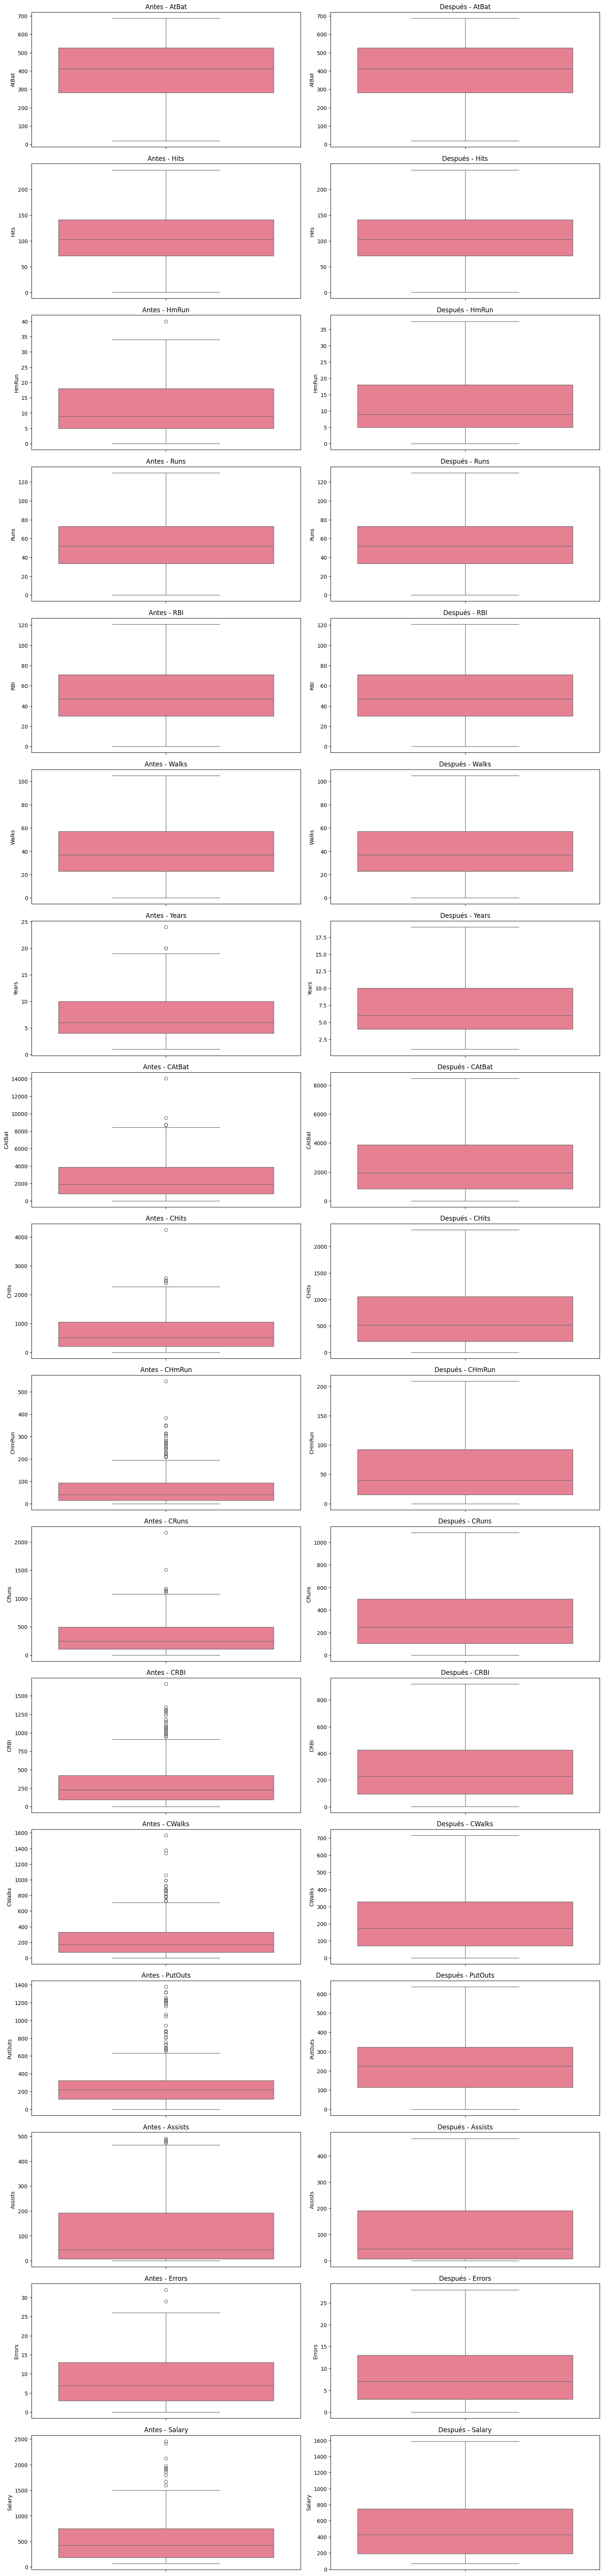

In [ ]:
#Vamos a realizar las cajas de Bigotes ANTES-DESPUES
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 4 * len(numerical_features)))

for i, variable in enumerate(numerical_features):
    # Antes de Winsorizer
    sns.boxplot(y=df[variable], ax=axes[i, 0], palette="husl")
    axes[i, 0].set_title(f"Antes - {variable}", fontsize=12)

    # Después de Winsorizer
    sns.boxplot(y=df_winsorized[variable], ax=axes[i, 1], palette="husl")
    axes[i, 1].set_title(f"Después - {variable}", fontsize=12)

fig.tight_layout()
plt.show()

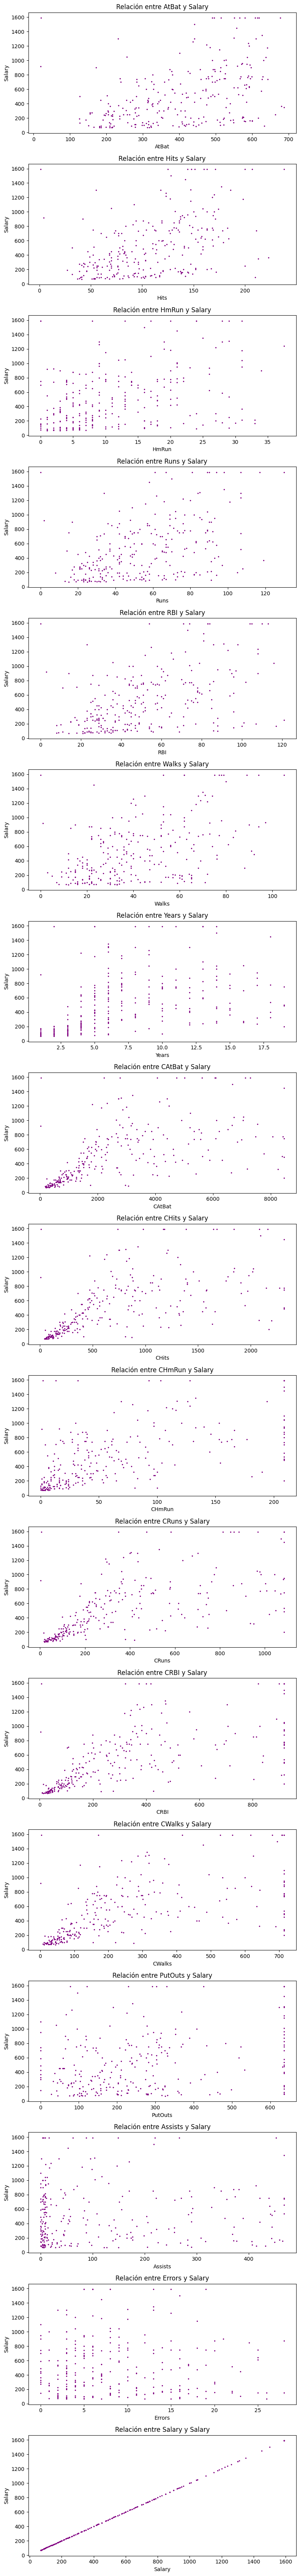

In [ ]:
##RELACIÓN VARIABLES CON EL SALARY
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    axes[i].scatter(df_winsorized[feature], df_winsorized['Salary'], color='purple', s=2)
    axes[i].set_title(f'Relación entre {feature} y Salary')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Salary')

fig.tight_layout()
plt.show()

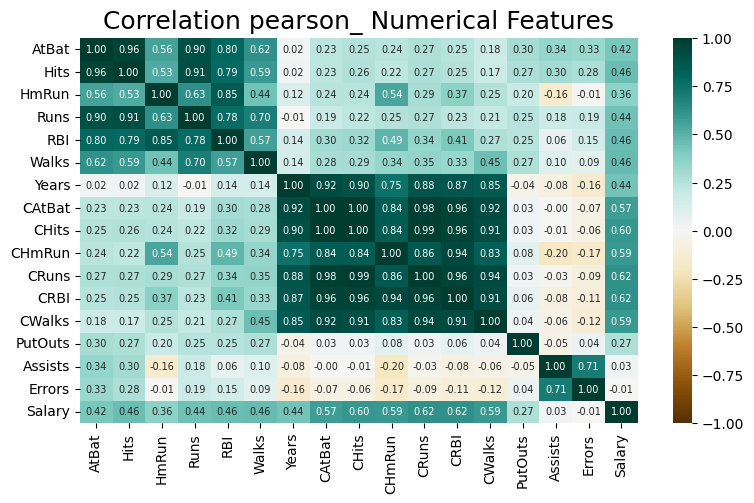

In [ ]:
numerical = df_winsorized.select_dtypes(include=['float64', 'int64']).columns.to_list()
#MAPA DE CALOR
plt.figure(figsize=(9,5))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_winsorized[numerical_features].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG',fmt='.2f', annot_kws={'size': 7})
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation pearson_ Numerical Features', fontdict={'fontsize':18}, pad=7);
#export
plt.savefig('numerical_correlation_clean.png',dpi=300,bbox_inches='tight')

In [ ]:
df_winsorized.columns  #Columnas

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [ ]:
categorical_features = df_winsorized.select_dtypes("object").columns.to_list()
categorical_features
df_winsorized.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7.000000,24,38,39,14,3449.000000,835,69.000000,321.000000,414.000000,375.000000,N,W,632,43,10,475.000000,N
2,479,130,18.000000,66,72,76,3,1624.000000,457,63.000000,224.000000,266.000000,263.000000,A,W,636,82,14,480.000000,A
3,496,141,20.000000,65,78,37,11,5628.000000,1575,208.750000,828.000000,838.000000,354.000000,N,E,200,11,3,500.000000,N
4,321,87,10.000000,39,42,30,2,396.000000,101,12.000000,48.000000,46.000000,33.000000,N,E,636,40,4,91.500000,N
5,594,169,4.000000,74,51,35,11,4408.000000,1133,19.000000,501.000000,336.000000,194.000000,A,W,282,421,25,750.000000,A


In [ ]:
df_winsorized = pd.get_dummies(df_winsorized)

In [ ]:
df_winsorized.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7.000000,24,38,39,14,3449.000000,835,69.000000,...,632,43,10,475.000000,False,True,False,True,False,True
2,479,130,18.000000,66,72,76,3,1624.000000,457,63.000000,...,636,82,14,480.000000,True,False,False,True,True,False
3,496,141,20.000000,65,78,37,11,5628.000000,1575,208.750000,...,200,11,3,500.000000,False,True,True,False,False,True
4,321,87,10.000000,39,42,30,2,396.000000,101,12.000000,...,636,40,4,91.500000,False,True,True,False,False,True
5,594,169,4.000000,74,51,35,11,4408.000000,1133,19.000000,...,282,421,25,750.000000,True,False,False,True,True,False


In [ ]:
df_winsorized.shape

(263, 23)

# ANÁLISIS CON REGRESIÓN LINEAL CON OUTLIERS MANEJADOS Y °statsModel Lineal

In [ ]:
#Modelo en base a 2 valores)

In [ ]:
import statsmodels.formula.api as smf #importación Libreria

In [ ]:
#lm = smf.ols(formula="Salary~CRBI",data=df_winsorized).fit()

In [ ]:
lmOut = smf.ols(formula="Salary ~ CHmRun - 1", data=df_winsorized).fit()

In [ ]:
lmOut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.663
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              514.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                    8.99e-64
Time:                        01:34:44   Log-Likelihood:                         -1936.2
No. Observations:                 263   AIC:                                      3874.
Df Residuals:                     262   BIC:                                      3878.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHmRun         6.0365      0.266     22.687      0.000       5.513       6.560
==============================================================================
Omnibus:                       24.342   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.592
Skew:                           0.304   Prob(JB):                     3.85e-17
Kurtosis:                       5.555   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predOut = lmOut.predict(df_winsorized['CHmRun'])
#pred = lm.predict(df_winsorized[['CHmRun', 'CRuns']])


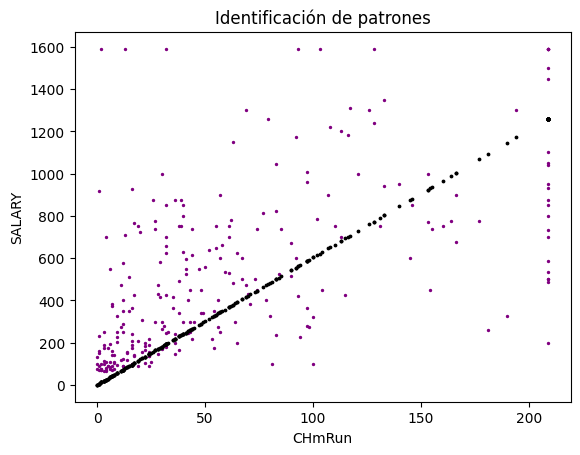

In [ ]:
plt.scatter(df_winsorized['CHmRun'],df_winsorized['Salary'],color='purple',s=2)
plt.scatter(df_winsorized['CHmRun'], predOut, s=3, color='black')
plt.title('Identificación de patrones')
plt.xlabel('CHmRun')
plt.ylabel('SALARY')
plt.show()

# Análisis regresión Lineal RIDGE con Outlier

In [ ]:
# Escalar los datos para mejorar estabilidad numérica
scalerOut = StandardScaler()
X_scaledOut = scaler.fit_transform(df_winsorized[['CHmRun']])
y_OutRidge = df_winsorized['Salary']

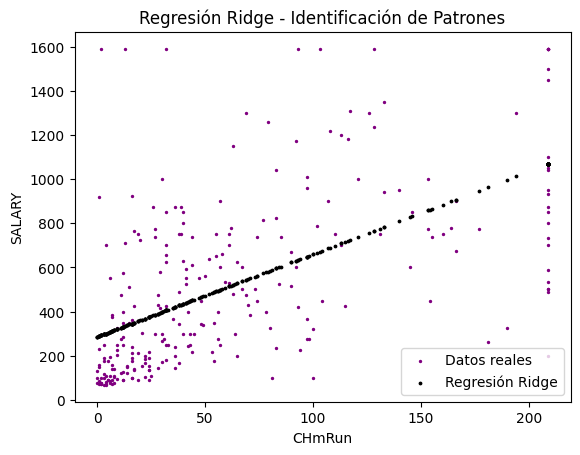

In [ ]:

# Entrenar el modelo Ridge
ridge_model_out = Ridge(alpha=1.0)
ridge_model_out.fit(X_scaledOut, y_OutRidge)

pred_RidgeOut = ridge_model_out.predict(X_scaledOut) #Prediccion

# Grafica los puntos reales
plt.scatter(df_winsorized['CHmRun'], df_winsorized['Salary'], color='purple', s=2, label="Datos reales")

# Grafica la regresión Ridge
plt.scatter(df_winsorized['CHmRun'], pred_RidgeOut, color='black', s=3, label="Regresión Ridge")

# Personalizar gráfico
plt.title('Regresión Ridge - Identificación de Patrones')
plt.xlabel('CHmRun')
plt.ylabel('SALARY')
plt.legend()
plt.show()


# Análisis regresión lineal LASSO - CON OUTLIERS ⚓

In [ ]:
#Importar librerias PARA MANEJAR LASSO
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:

# Escalamos los datos
scalerlasso_out = StandardScaler()
X_scaledLasso_out = scaler.fit_transform(df_winsorized[['CHmRun']])
yLasso_out = df_winsorized['Salary']


In [ ]:

# Entrenar el modelo Lasso
lasso_model_out = Lasso(alpha=1.0)
lasso_model_out.fit(X_scaledLasso_out, yLasso_out)

# Predicciones
predLasso_out = lasso_model_out.predict(X_scaledLasso_out)

# Graficar los puntos reales
plt.scatter(df_winsorized['CHmRun'], df_winsorized['Salary'], color='purple', s=2, label="Datos reales")

# Graficar la regresión Lasso
plt.scatter(df_winsorized['CHmRun'], predLasso_out, color='black', s=3, label="Regresión Lasso")


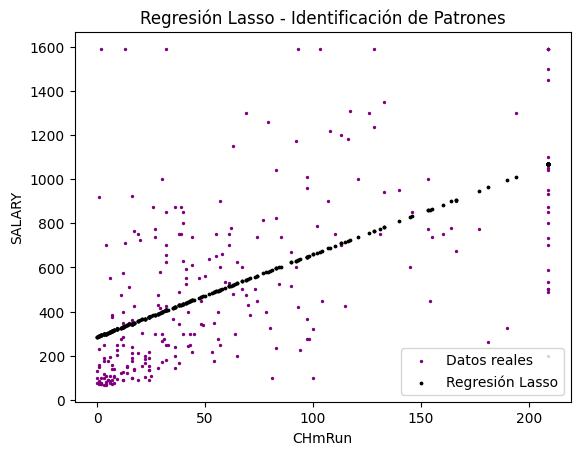

In [ ]:

# Personalizar gráfico
plt.title('Regresión Lasso - Identificación de Patrones')
plt.xlabel('CHmRun')
plt.ylabel('SALARY')
plt.legend()
plt.show()




---

##Regresión Lineal con Sklearn y Outliers ✈

In [ ]:
from sklearn.feature_selection import RFE # Nos ayuda a seleccionar las variables más relevantes en la estimación
from sklearn.feature_selection import RFECV

# Para la estimación
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [ ]:
df_winsorized.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N'],
      dtype='object')

In [ ]:
feature_cols_out = ['CRBI','CRuns','CHits','CWalks','CHmRun'
'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
                'PutOuts', 'Assists','League_A', 'League_N', 'Division_E', 'Division_W',
       'NewLeague_A', 'NewLeague_N','Errors']


In [ ]:
x_out = df_winsorized.drop(labels='Salary',axis=1)
y_out = df_winsorized['Salary']

In [ ]:
x_out.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7.000000,24,38,39,14,3449.000000,835,69.000000,...,375.000000,632,43,10,False,True,False,True,False,True
2,479,130,18.000000,66,72,76,3,1624.000000,457,63.000000,...,263.000000,636,82,14,True,False,False,True,True,False
3,496,141,20.000000,65,78,37,11,5628.000000,1575,208.750000,...,354.000000,200,11,3,False,True,True,False,False,True
4,321,87,10.000000,39,42,30,2,396.000000,101,12.000000,...,33.000000,636,40,4,False,True,True,False,False,True
5,594,169,4.000000,74,51,35,11,4408.000000,1133,19.000000,...,194.000000,282,421,25,True,False,False,True,True,False


In [ ]:
#Estimator - Manejo del kernel
estimator_out = SVR(kernel="linear")

selector_out = RFE(estimator_out, n_features_to_select=4, step=1)
selector_out = selector_out.fit(x_out,y_out)
print(selector_out)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=4)


In [ ]:
selector_out.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False])

In [ ]:
list(zip(feature_cols_out, selector_out.support_))

[('CRBI', False),
 ('CRuns', False),
 ('CHits', False),
 ('CWalks', False),
 ('CHmRunAtBat', False),
 ('Hits', False),
 ('HmRun', False),
 ('Runs', False),
 ('RBI', False),
 ('Walks', False),
 ('Years', False),
 ('CAtBat', False),
 ('PutOuts', False),
 ('Assists', False),
 ('League_A', False),
 ('League_N', False),
 ('Division_E', False),
 ('Division_W', True),
 ('NewLeague_A', True),
 ('NewLeague_N', True),
 ('Errors', True)]

In [ ]:
selector_out.ranking_

array([ 8,  6,  5,  9, 11,  7, 13, 16, 18,  3, 12, 14, 19, 15, 17, 10,  2,
        1,  1,  1,  1,  4])

In [ ]:
x_pred_out = x_out[['NewLeague_N','NewLeague_A','Division_W' ]]


In [ ]:
lm3_out = LinearRegression()
lm3_out.fit(x_pred_out, y_out)

LinearRegression()

In [ ]:
lm3_out.coef_

array([ 4.82965914e-02, -4.82965914e-02, -1.45693240e+02])

In [ ]:
lm3_out.intercept_

594.2602842583158

In [ ]:
list(zip(x_pred_out,lm3_out.coef_ ))

[('NewLeague_N', 0.04829659141568871),
 ('NewLeague_A', -0.04829659141567555),
 ('Division_W', -145.69323973656844)]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Coeficientes
print("Coeficientes:", lm3_out.coef_)
# Intersección (término independiente)
print("Intersección:", lm3_out.intercept_)

# Métricas
y_pred_out = lm3_out.predict(x_pred_out )
mse_out = mean_squared_error(y_out, y_pred_out)
r2_out = r2_score(y_out, y_pred_out)

print("Mean Squared Error (MSE):", mse_out)
print("R^2 Score:", r2_out)

Coeficientes: [ 4.82965914e-02 -4.82965914e-02 -1.45693240e+02]
Intersección: 594.2602842583158
Mean Squared Error (MSE): 154812.27577818613
R^2 Score: 0.03313034345824617


TOP 10 variables importantes

In [ ]:
import plotly.express as px #Importacion libreria

In [ ]:
lm3_out= LinearRegression() #
lm3_out.fit(x_out, y_out)

LinearRegression()

In [ ]:
# Obtener los coeficientes y sus características correspondientes
coef_importances = pd.DataFrame({"Importance": abs(lm3_out.coef_)}, index=x_out.columns)

# Ordenar por importancia
coef_importances = coef_importances.sort_values(by="Importance", ascending=False)

# Tomar las 10 variables más importantes (opcional)
top_features_out = coef_importances.head(10)

# Generar el gráfico de barras
# Generar el gráfico de barras con una paleta de colores diferente, por ejemplo
fig = px.bar(top_features_out, x=top_features_out.index, y='Importance', text='Importance',
             opacity=0.7, color_discrete_sequence=px.colors.sequential.matter)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#1c1b1b'),
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 10 Most Important Predictors',
                  coloraxis_showscale=False, showlegend=False, font_color="#303030", height=500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance",
                  xaxis=dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

# No lineal -AVANCES

In [ ]:
def polynomial_sframe(feature, degree):
    # Inicializamos un DataFrame vacío
    poly_sframe = pd.DataFrame()

    # Creamos la primera columna con el valor original de la característica
    poly_sframe['power_1'] = feature

    # Si el grado es mayor a 1, creamos las columnas adicionales
    if degree > 1:
        for power in range(2, degree+1):
            # Nombramos la columna
            name = 'power_' + str(power)
            # Agregamos la columna correspondiente al DataFrame
            poly_sframe[name] = feature**power

    return poly_sframe

In [ ]:
poly1_data = polynomial_sframe(df_winsorized['CRBI'], 1)
poly1_data['Salary'] = df_winsorized['Salary']

In [ ]:
poly1_data

In [ ]:
x = df_winsorized.drop(columns=['Salary'])
y = df_winsorized['Salary']

In [ ]:
model1 = LinearRegression()
model1.fit(x, y)

In [ ]:
degree = 2

poly_features1 = polynomial_sframe(df_winsorized['CRBI'], degree)

poly_data = pd.concat([poly_features1], axis=1)
poly_data['Salary'] = df_winsorized['Salary']

x = poly_data.drop(columns=['Salary'])
y = poly_data['Salary']

model2 = LinearRegression()
model2.fit(x, y)

In [ ]:
poly_features1.head()

$$ SALARY = \beta_{0} + \beta_{1}(CRBI) + \beta_{2}(CRBI)^{2} $$
$$ SALARY = 74.99231773708664 +  2.24378409e+0(CRBI) -1.47546447e-03(CRBI)^{2}$$

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Coeficientes del modelo
print("Coeficientes:", model2.coef_)

# Intersección (término independiente)
print("Intersección:", model2.intercept_)

# Métricas de evaluación del modelo
y_pred = model2.predict(x)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

In [ ]:
print(poly_features1.columns)  # Verifica los nombres de las columnas


In [ ]:
#sorted_indices = np.argsort(poly_features1['power_1'])


In [ ]:
sorted_indices = np.argsort(poly_features1.loc[:, 'power_1'].values)
sorted_power_1 = poly_features1.loc[:, 'power_1'].values[sorted_indices]

In [ ]:
sorted_predictions = model2.predict(x)[sorted_indices]

# Graficar los puntos originales
plt.plot(poly_features1['power_1'], poly_data['Salary'], '.', label='Datos Originales')

# Graficar la predicción del modelo con la curva suave
plt.plot(sorted_power_1, sorted_predictions, '-', label='Predicción del Modelo')

plt.xlabel('CRBI')
plt.ylabel('Precio')
plt.legend()
plt.show()

Consideremos un modelo  $$y=\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{1}^{2} + \beta_{3}x_{2} + \beta_{4}x_{2}^{2} + \beta_{5}x_{3} + \beta_{6}x_{3}^{2} + ϵ $$